<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson%2044/Lesson_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 44

## Завдання:
-Використовуючи датасет train.csv, побудувати діаграму розподілу змінної Age.

-Заповнити пропущені значення.

-Обґрунтувати вибір способу заповнення пропущених значень.

## Імпортування бібліотек та завантаження данних

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import normaltest

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', parse_dates=True, index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Діаграмма розподілу віку

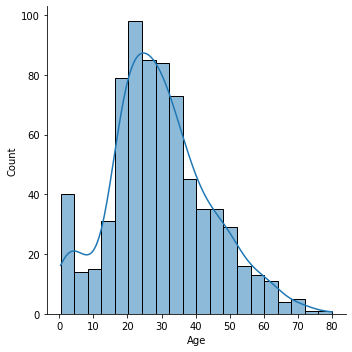

In [3]:
sns.displot(df, x='Age', kde=True)

##Заповнення пропущенних данних

###Аналіз кількості пропущених данних та їх типу

In [4]:
# Аналіз кількості пропущенних данних
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
# describe all the columns
df.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


###Заповнення віку

####Методом середнього

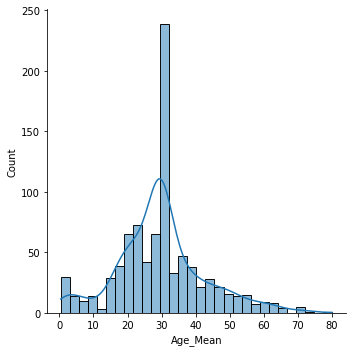

In [6]:
df['Age_Mean']=df['Age'].fillna(df['Age'].mean())
sns.displot(df, x='Age_Mean', kde=True)

In [7]:
stat, p = normaltest(df['Age_Mean'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=43.859, p=0.000
Probably not Gaussian


####Методом bfill

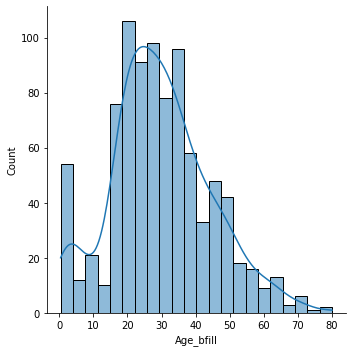

In [8]:
df['Age_bfill']=df['Age']
df['Age_bfill'].fillna(method='bfill', inplace=True)
sns.displot(df, x='Age_bfill', kde=True)

In [9]:
stat, p = normaltest(df['Age_bfill'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=18.329, p=0.000
Probably not Gaussian


####Методом ffill

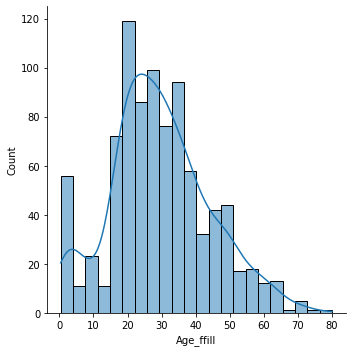

In [10]:
df['Age_ffill']=df['Age']
df['Age_ffill'].fillna(method='ffill', inplace=True)
sns.displot(df, x='Age_ffill', kde=True)

In [11]:
stat, p = normaltest(df['Age_ffill'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=15.661, p=0.000
Probably not Gaussian


### Аналіз та вибір методу заповнення віку

####-Жоден із методів не показав гарних результатів, обираємо за найкращіми показниками метод ffil

In [12]:
df['Age']=df['Age_ffill']
df.drop(columns={'Age_ffill', 'Age_bfill', 'Age_Mean'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


###Заповнення кают

In [13]:
# Заповнюемо значення колонки з каютами там де є каюта 1 а там де немає 0
df['Cabin'] = np.where(df['Cabin'].isnull(), 0, 1)
df['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

###Заповнення бронювань

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

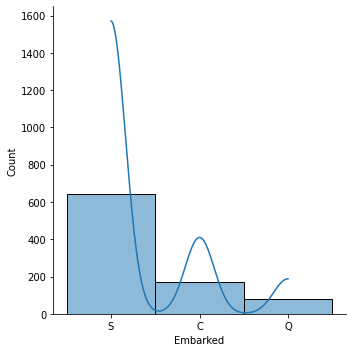

In [15]:
sns.displot(df, x='Embarked', kde=True)

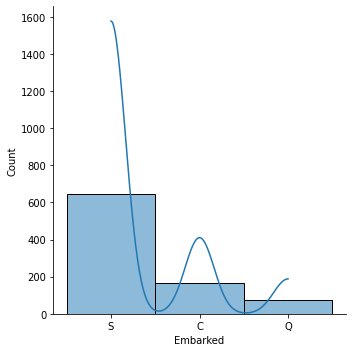

In [16]:
#Заповнюємо пропущєні значення найчастіше зустрічающимися значеннями
df['Embarked'].replace(np.nan, 'S', inplace = True)
sns.displot(df, x='Embarked', kde=True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

##